<a href="https://colab.research.google.com/github/dev-SARDAR/FMML_Assignment-2022/blob/main/Copy_of_FMML_Module4_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron
### Module Coordinator: Jashn Arora

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

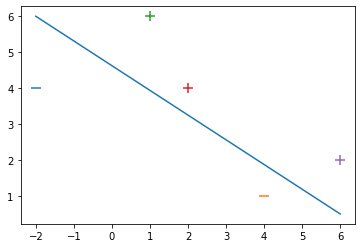

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

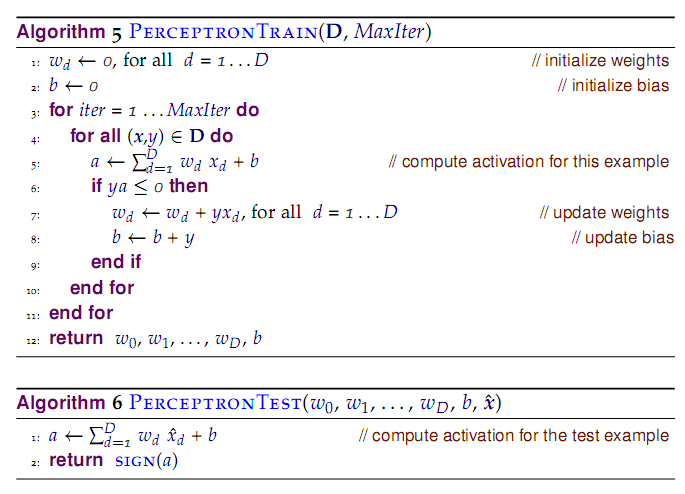

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

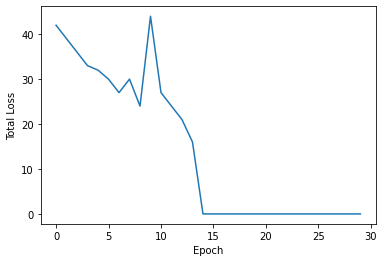

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

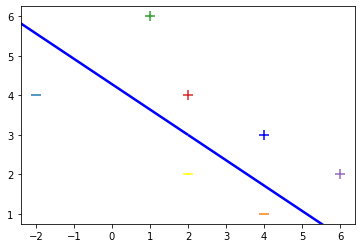

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



#Q. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

##Answer:

###Took "Sonar" dataset where target label is either "R"=Rock or "M"=Mine

###Sonar, Mines vs. Rocks

- "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.
- "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.
- The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.
- Each pattern is a set of 60 numbers in the range 0.0 to 1.0.
- Each number represents the energy within a particular frequency band, integrated over a certain period of time.
- The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.
- The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).
- The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.



In [14]:
from google.colab import files
uploaded = files.upload()

Saving sonar.all-data.csv to sonar.all-data.csv


In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("sonar.all-data.csv",header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [17]:
df.shape

(208, 61)

In [18]:
df1=df.drop([60],axis=1).to_numpy() # Converting dataframe into numpy array 
temp_y=df[60].replace(['M','R'],[1,-1]) # Converting Alphabetical labels into numerical labels
temp_y

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

[ 1.6907  0.7052  0.9593  5.851   3.4659 -0.1029  1.36   -7.3028 -5.2774
  1.2584 -0.3634 -1.3443 -0.6485  3.1836  6.9911 -0.0434 -0.6616  3.0586
 -1.024  -2.5623  3.9359  1.8532 -2.9508  2.7451  2.8699 -0.1965  0.8353
  1.8411 -4.8273  1.9505  1.2316  0.1397  1.8597 -0.1563  2.7359 -2.5188
 -3.2166 -0.1944 -2.5343  0.1467  8.7181  3.2636  1.7538 -4.2897 -1.4626
  2.9711  0.725   0.564   0.9516 -0.1275  0.3017  0.4474  0.5009  0.2667
  0.289  -0.2774  0.035   0.7219  1.0123  1.4087]


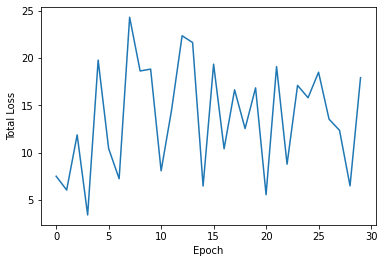

In [19]:
print(perceptron_algo_plot(df1, temp_y.tolist()))

#Q. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

##Answer:

In [20]:
# User-defined function which takes learning rate as input parameter
def perceptron_algo_plot_learn(X, Y,eta):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

##For "TOY" dataset

[-0.0002  0.0003  0.0015]


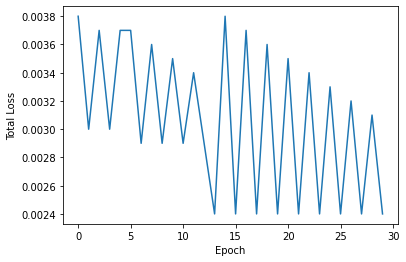

In [21]:
print(perceptron_algo_plot_learn(X, y,0.0001))

array([-0.02,  0.03,  0.15])

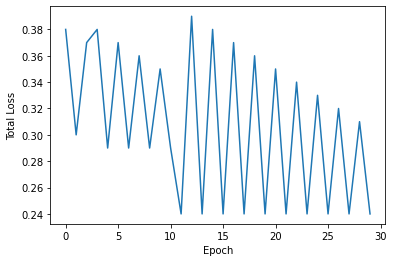

In [22]:
perceptron_algo_plot_learn(X, y,0.01)

array([-0.2,  0.3,  1.5])

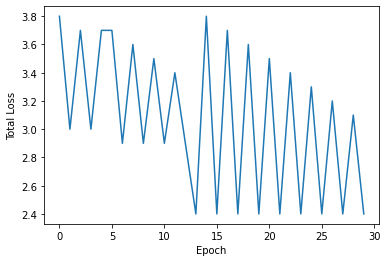

In [23]:
perceptron_algo_plot_learn(X, y,0.1)

array([-20.,  30., 150.])

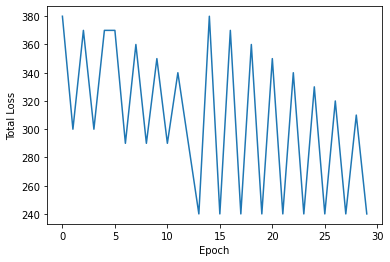

In [24]:
perceptron_algo_plot_learn(X, y,10)

array([-200.,  300., 1500.])

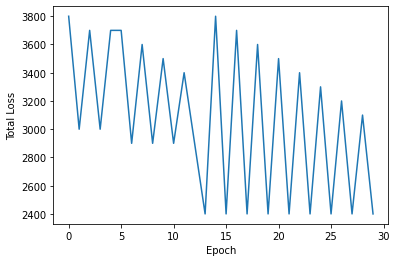

In [25]:
perceptron_algo_plot_learn(X, y,100)

array([-2.0e+07,  3.0e+07,  1.5e+08])

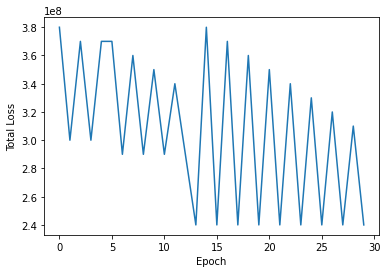

In [26]:
perceptron_algo_plot_learn(X, y,10000000)

###Here varying learning rate showed fluctuations on the y-axis (total loss) but the curve seems to be similar in it's structure and converged at same point.

##For "SONAR" dataset

[ 1.6907e-07  7.0520e-08  9.5930e-08  5.8510e-07  3.4659e-07 -1.0290e-08
  1.3600e-07 -7.3028e-07 -5.2774e-07  1.2584e-07 -3.6340e-08 -1.3443e-07
 -6.4850e-08  3.1836e-07  6.9911e-07 -4.3400e-09 -6.6160e-08  3.0586e-07
 -1.0240e-07 -2.5623e-07  3.9359e-07  1.8532e-07 -2.9508e-07  2.7451e-07
  2.8699e-07 -1.9650e-08  8.3530e-08  1.8411e-07 -4.8273e-07  1.9505e-07
  1.2316e-07  1.3970e-08  1.8597e-07 -1.5630e-08  2.7359e-07 -2.5188e-07
 -3.2166e-07 -1.9440e-08 -2.5343e-07  1.4670e-08  8.7181e-07  3.2636e-07
  1.7538e-07 -4.2897e-07 -1.4626e-07  2.9711e-07  7.2500e-08  5.6400e-08
  9.5160e-08 -1.2750e-08  3.0170e-08  4.4740e-08  5.0090e-08  2.6670e-08
  2.8900e-08 -2.7740e-08  3.5000e-09  7.2190e-08  1.0123e-07  1.4087e-07]


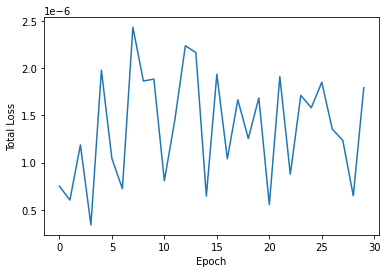

In [27]:
print(perceptron_algo_plot_learn(df1, temp_y.tolist(),0.0000001))

[ 0.1673793  0.0698148  0.0949707  0.579249   0.3431241 -0.0101871
  0.13464   -0.7229772 -0.5224626  0.1245816 -0.0359766 -0.1330857
 -0.0642015  0.3151764  0.6921189 -0.0042966 -0.0654984  0.3028014
 -0.101376  -0.2536677  0.3896541  0.1834668 -0.2921292  0.2717649
  0.2841201 -0.0194535  0.0826947  0.1822689 -0.4779027  0.1930995
  0.1219284  0.0138303  0.1841103 -0.0154737  0.2708541 -0.2493612
 -0.3184434 -0.0192456 -0.2508957  0.0145233  0.8630919  0.3230964
  0.1736262 -0.4246803 -0.1447974  0.2941389  0.071775   0.055836
  0.0942084 -0.0126225  0.0298683  0.0442926  0.0495891  0.0264033
  0.028611  -0.0274626  0.003465   0.0714681  0.1002177  0.1394613]


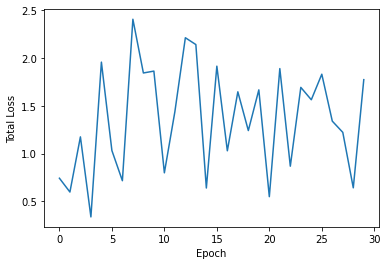

In [28]:
print(perceptron_algo_plot_learn(df1, temp_y.tolist(),0.099))

[  78756.1874   32849.6264   44686.1126  272551.282   161448.5538
   -4793.2878   63351.52   -340179.0296 -245831.8468   58618.7888
  -16927.8988  -62620.1826  -30208.427   148298.4552  325659.4202
   -2021.6588  -30818.6512  142475.7052  -47699.968  -119357.0586
  183342.0938   86325.7624 -137454.1656  127872.2482  133685.6818
   -9153.363    38909.9446   85762.1202 -224865.2886   90858.191
   57370.3912    6507.5054   86628.5454   -7280.7666  127443.6938
 -117330.7416 -149835.6612   -9055.5408 -118052.7626    6833.5794
  406106.5342  152025.0152   81695.5116 -199822.8054  -68130.8332
  138399.7802   33771.95     26272.248    44327.4312   -5939.205
   14053.7894   20840.7868   23332.9238   12423.4194   13462.198
  -12921.8468    1630.37     33627.5458   47154.9586   65620.0634]


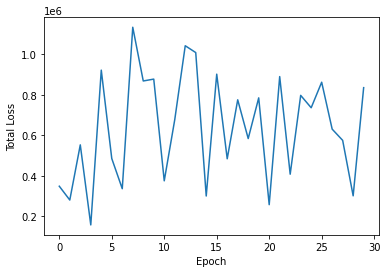

In [29]:
print(perceptron_algo_plot_learn(df1, temp_y.tolist(),46582))

[ 1.6907e+15  7.0520e+14  9.5930e+14  5.8510e+15  3.4659e+15 -1.0290e+14
  1.3600e+15 -7.3028e+15 -5.2774e+15  1.2584e+15 -3.6340e+14 -1.3443e+15
 -6.4850e+14  3.1836e+15  6.9911e+15 -4.3400e+13 -6.6160e+14  3.0586e+15
 -1.0240e+15 -2.5623e+15  3.9359e+15  1.8532e+15 -2.9508e+15  2.7451e+15
  2.8699e+15 -1.9650e+14  8.3530e+14  1.8411e+15 -4.8273e+15  1.9505e+15
  1.2316e+15  1.3970e+14  1.8597e+15 -1.5630e+14  2.7359e+15 -2.5188e+15
 -3.2166e+15 -1.9440e+14 -2.5343e+15  1.4670e+14  8.7181e+15  3.2636e+15
  1.7538e+15 -4.2897e+15 -1.4626e+15  2.9711e+15  7.2500e+14  5.6400e+14
  9.5160e+14 -1.2750e+14  3.0170e+14  4.4740e+14  5.0090e+14  2.6670e+14
  2.8900e+14 -2.7740e+14  3.5000e+13  7.2190e+14  1.0123e+15  1.4087e+15]


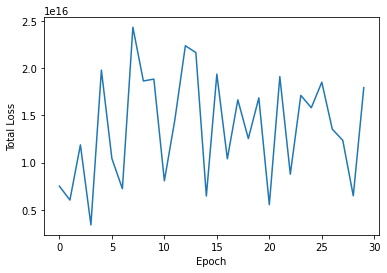

In [30]:
print(perceptron_algo_plot_learn(df1, temp_y.tolist(),1000000000000000))

- If we set the learning rate to a very small value, gradient descent will eventually reach the local minimum but that may take a while.
- So, the learning rate should never be too high or too low for this reason.
- When the learning rate is too large, gradient descent can inadvertently increase rather than decrease the training error.
- When the learning rate is too small, training is not only slower, but may become permanently stuck with a high training error.
- However, the above observations showed some fluctuations on scale of y-axis (total loss) but the pattern seems to be similar and converging at same point.

#Q. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

##Answer:

In [31]:
import pandas as pd
import plotly.express as px

In [32]:
temp=np.array([[-1,-1,-1],
           [-2,-2,-2],
           [1,1,1],
           [1,2,-3],
           [1,-2,-3],
           [-1,2,-3],
           [1,-2,3],
           [1,-2,-3],
           [-1,-2,3],
           [-1,-2,-3]])
X=pd.DataFrame(temp, columns=["a","b","c"])
X["Output"]=(np.array([1,-1,1,1,1,-1,-1,-1,-1,1]))

In [33]:
# The data is not linearly separable
px.scatter_3d(X,x="a",y="b",z="c",color="Output")

[ 2.  0. -2.]


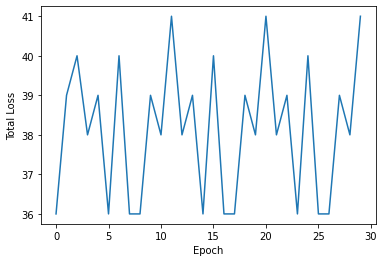

In [34]:
print(perceptron_algo_plot(temp, X["Output"].tolist()))

##**Observations:**

- As the data is not linearly separable, the total loss fluctuates between minimum and some large value.
- This is because the data is not linearly separable.
- In toy dataset that I have taken, the loss function seems to fluctuate in a cyclic manner and is not converging.



---



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


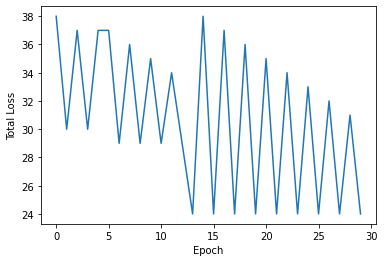

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.